In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
import time

In [5]:
df=pd.read_csv("dataset.csv")
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [6]:
del df['index']

In [7]:
df.shape

(11055, 31)

In [8]:
df.columns

Index(['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

### Violin plot

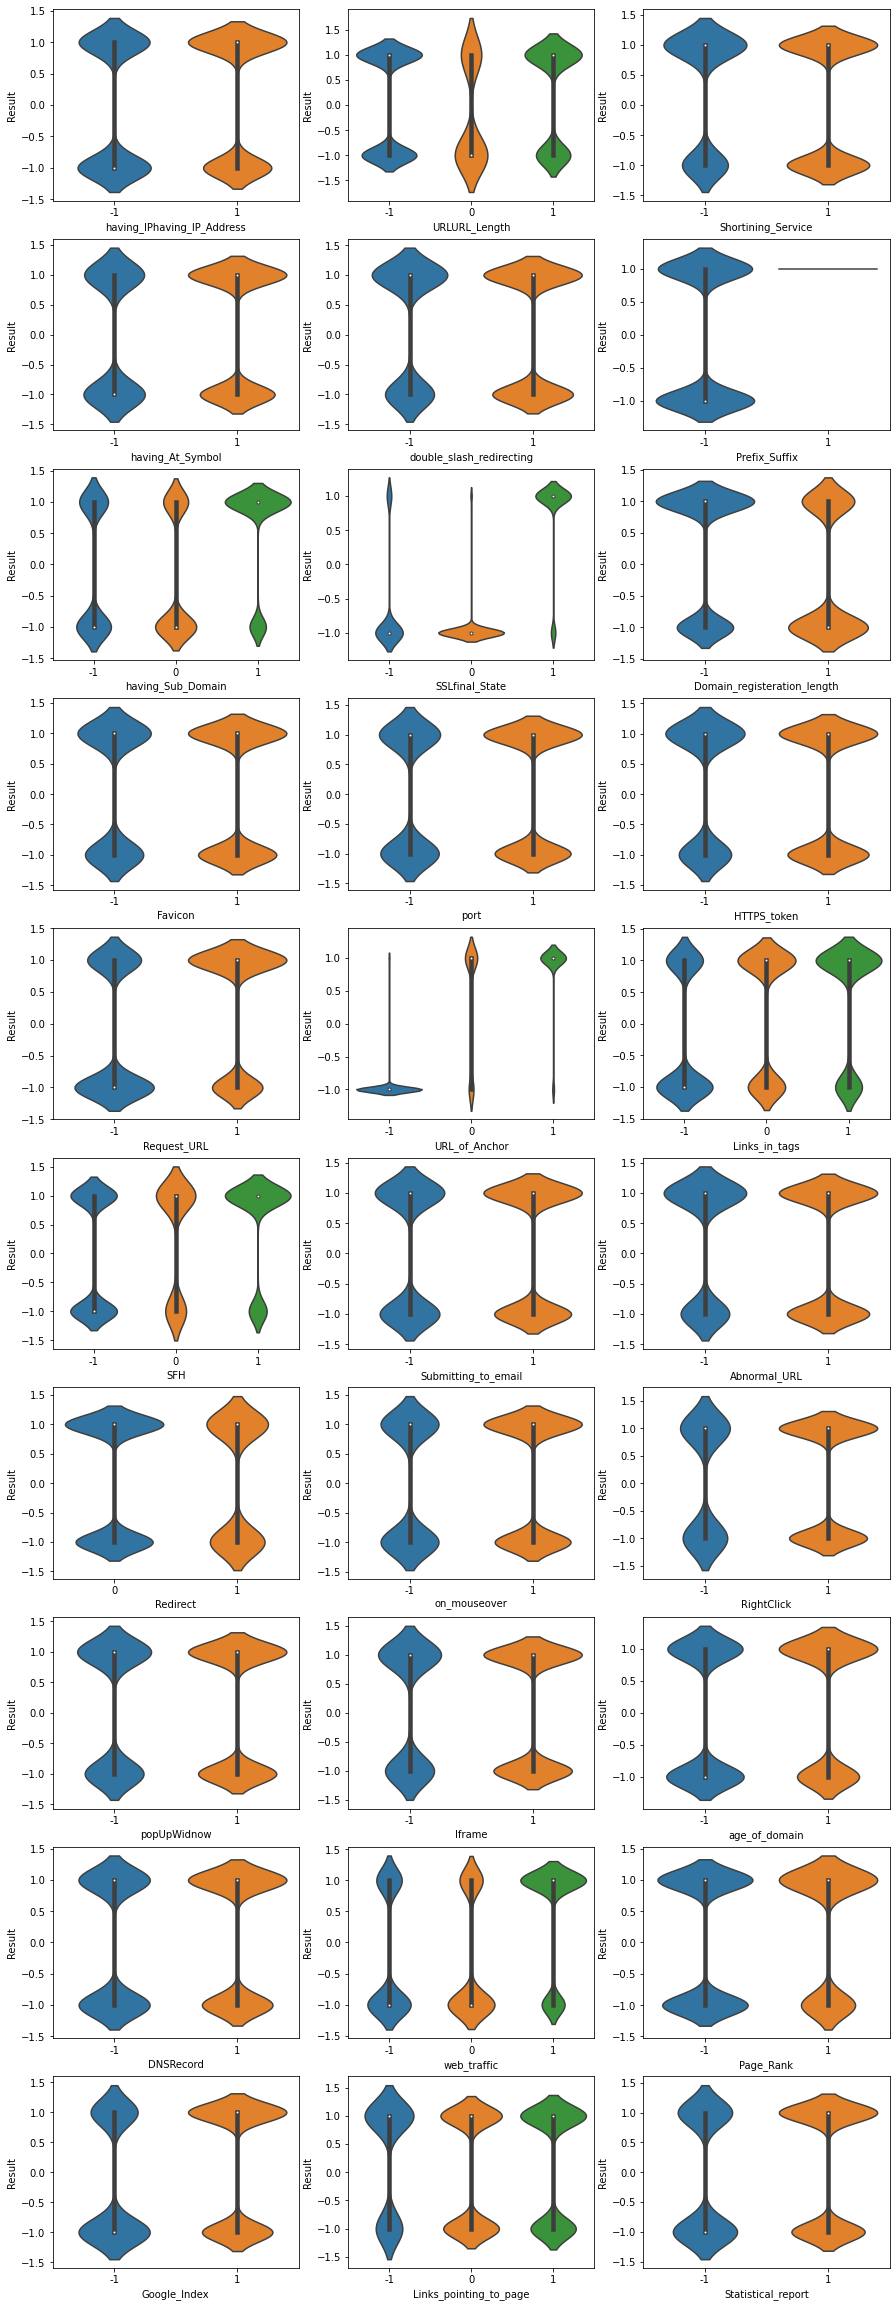

In [10]:
plt.figure(figsize=(15,50),facecolor='white')
plotnumber=1
for column in df.drop(['Result'],axis=1):
    ax=plt.subplot(12,3,plotnumber)
    sns.violinplot(df=df,x=df[column],y=df["Result"])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()   

 1    6157
-1    4898
Name: Result, dtype: int64


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

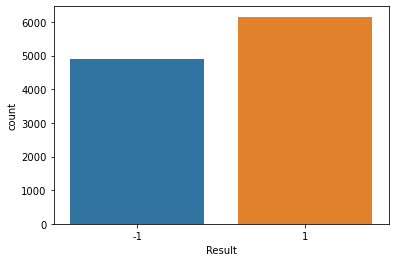

In [11]:
print(df['Result'].value_counts())
sns.countplot(df['Result'])

##get correlations of each features in dataset

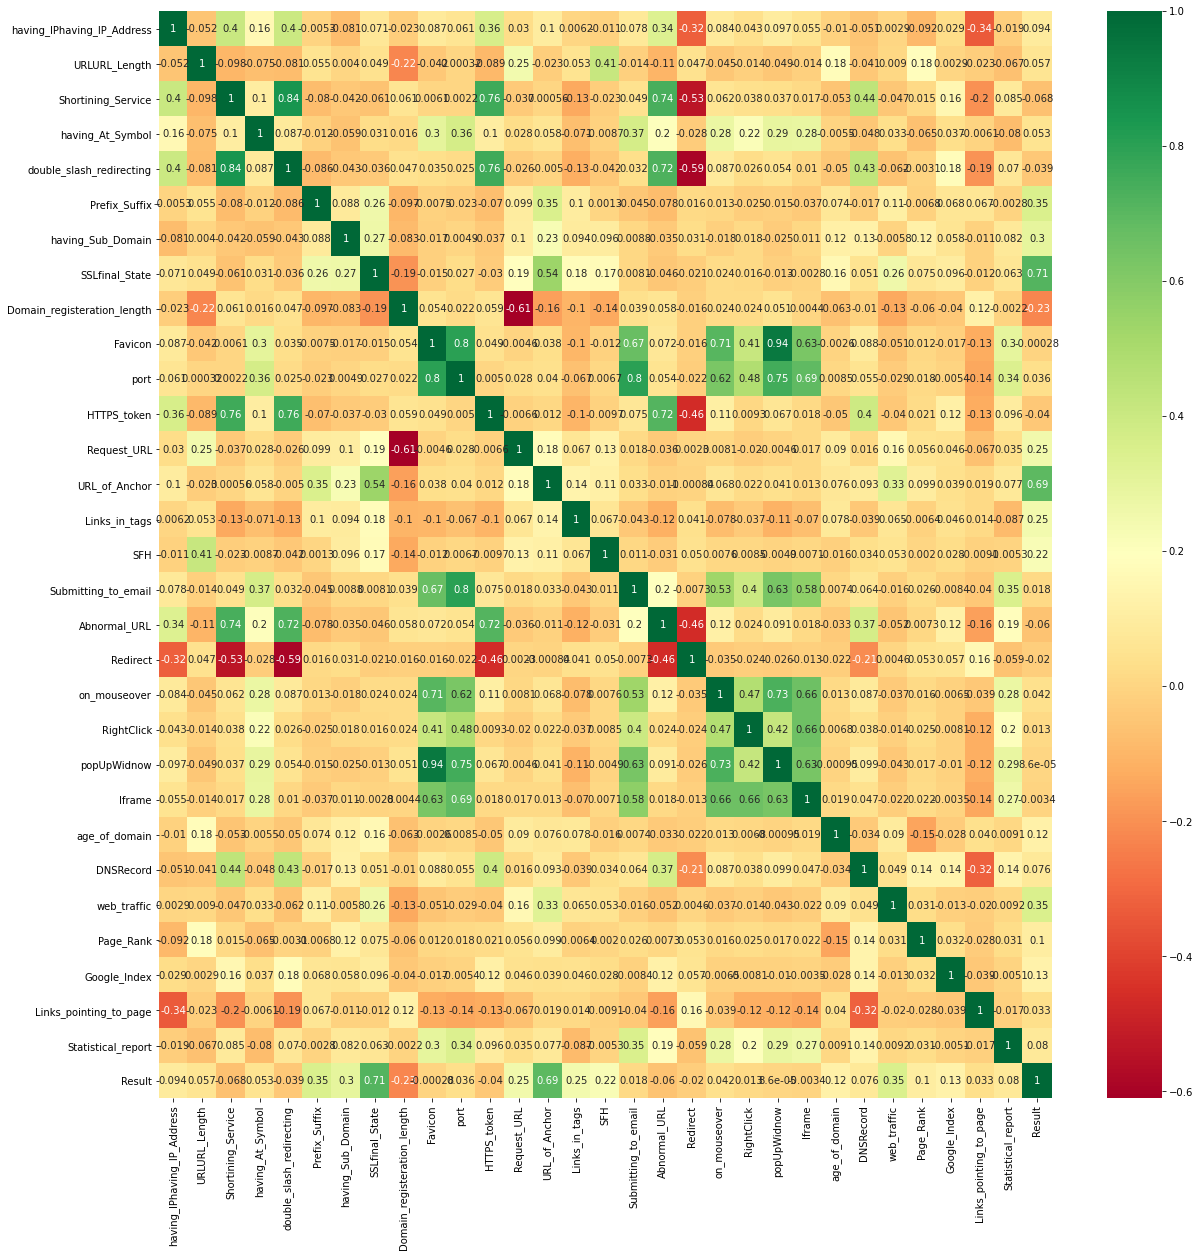

In [12]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
plt.savefig('g')

<Figure size 432x288 with 0 Axes>

In [49]:
print(df.corr()['Result'].sort_values())

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229
Request_URL                    0.253372


In [50]:

# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,-1,0,1,-1
1,1,1,1,-1,1,-1,-1,-1,-1,1,1,1,1,-1,0,1,1,1,0,1,1,1,1,-1,1,-1,-1,-1,0,1,-1
2,1,-1,1,1,1,-1,1,1,-1,1,1,1,-1,0,1,1,1,1,0,1,1,1,1,-1,1,1,1,1,0,1,1
3,-1,-1,1,-1,1,-1,-1,0,1,-1,-1,1,-1,-1,1,-1,-1,1,0,1,1,-1,1,1,1,0,-1,-1,0,1,-1
4,1,-1,-1,-1,-1,-1,0,1,-1,1,1,-1,1,0,-1,1,-1,-1,0,1,1,1,1,-1,-1,1,1,1,-1,1,1


In [51]:
#spearting data
X= df.drop(columns='Result')
Y=df['Result']

In [52]:
X.shape,Y.shape

((11055, 30), (11055,))

### Splitting the dataset into the Training set and Test set

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 35)
X_train.shape, X_test.shape

((7738, 30), (3317, 30))

## Creating holders to store the model performance results

In [54]:
ML_Model = []
acc_test = []

#function to call for storing the results
def storeResults(model,b):
    ML_Model.append(model)
    acc_test.append(round(b, 3))

## Logistic Regression using Grid search

In [74]:
# logistic regression using Grid search
start_time=time.time()
clf= LogisticRegression(solver="liblinear")
gridsearch_values={'penalty':['l1','l2'],'C':[0.001,0.009,0.01,0.09,1,5],'max_iter':[150,200,250,300,350]}
grid_clf_acc= GridSearchCV(clf,param_grid=gridsearch_values,scoring='f1',verbose=0,n_jobs=-1,cv=5)
grid_clf_acc.fit(X_train,Y_train)
end_time=time.time()
print("Total time taken", end_time-start_time)

Total time taken 23.211795568466187


### training dataset will divide into 5 parts(chunks) and it will consider 4 parts and test(validate) with the 5th part this repeats with 5 combinations. Finally, gives best parameters

In [75]:
# optimal parameters
grid_clf_acc.best_params_

{'C': 0.09, 'max_iter': 150, 'penalty': 'l2'}

In [76]:
# train models with best parameters
clf= LogisticRegression(solver="liblinear",C=0.09,max_iter=150,penalty='l2')
clf.fit(X_train,Y_train)

LogisticRegression(C=0.09, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
predicted_values= clf.predict(X_test)

In [78]:
# new model evaluation metrics
print('Accuracy Score:' + str(accuracy_score(Y_test,predicted_values)))
print('Precision Score:'+ str(accuracy_score(Y_test,predicted_values)))
print('Recall Score:'+ str(recall_score(Y_test, predicted_values)))
print('F1 Score:' + str(f1_score(Y_test,predicted_values)))

Accuracy Score:0.930660235152246
Precision Score:0.930660235152246
Recall Score:0.9514457174031642
F1 Score:0.9381387842926304


In [79]:
grid_clf_acc.best_score_

0.9348686783626414

In [80]:
X,Y,Z=[],[],[]
for i,j in zip(grid_clf_acc.cv_results_["params"],grid_clf_acc.cv_results_["mean_test_score"]):
  
  X.append(i["C"])
  Y.append(i["max_iter"])
  Z.append(j)
  print(i,j)

{'C': 0.001, 'max_iter': 150, 'penalty': 'l1'} 0.8989926461861332
{'C': 0.001, 'max_iter': 150, 'penalty': 'l2'} 0.9253080153632457
{'C': 0.001, 'max_iter': 200, 'penalty': 'l1'} 0.8989926461861332
{'C': 0.001, 'max_iter': 200, 'penalty': 'l2'} 0.9253080153632457
{'C': 0.001, 'max_iter': 250, 'penalty': 'l1'} 0.8989926461861332
{'C': 0.001, 'max_iter': 250, 'penalty': 'l2'} 0.9253080153632457
{'C': 0.001, 'max_iter': 300, 'penalty': 'l1'} 0.8989926461861332
{'C': 0.001, 'max_iter': 300, 'penalty': 'l2'} 0.9253080153632457
{'C': 0.001, 'max_iter': 350, 'penalty': 'l1'} 0.8989926461861332
{'C': 0.001, 'max_iter': 350, 'penalty': 'l2'} 0.9253080153632457
{'C': 0.009, 'max_iter': 150, 'penalty': 'l1'} 0.9232113943467694
{'C': 0.009, 'max_iter': 150, 'penalty': 'l2'} 0.9313307185814441
{'C': 0.009, 'max_iter': 200, 'penalty': 'l1'} 0.9232113943467694
{'C': 0.009, 'max_iter': 200, 'penalty': 'l2'} 0.9313307185814441
{'C': 0.009, 'max_iter': 250, 'penalty': 'l1'} 0.9232113943467694
{'C': 0.00

In [81]:
grid_clf_acc.best_estimator_

LogisticRegression(C=0.09, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics

In [83]:
fpr, tpr, thresholds = roc_curve(Y_test, predicted_values)

In [84]:
# Area Under Curve
auc = roc_auc_score(Y_test, predicted_values)
auc

0.9282161201571076

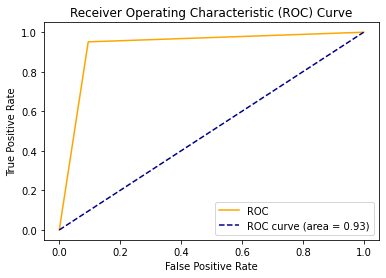

In [85]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

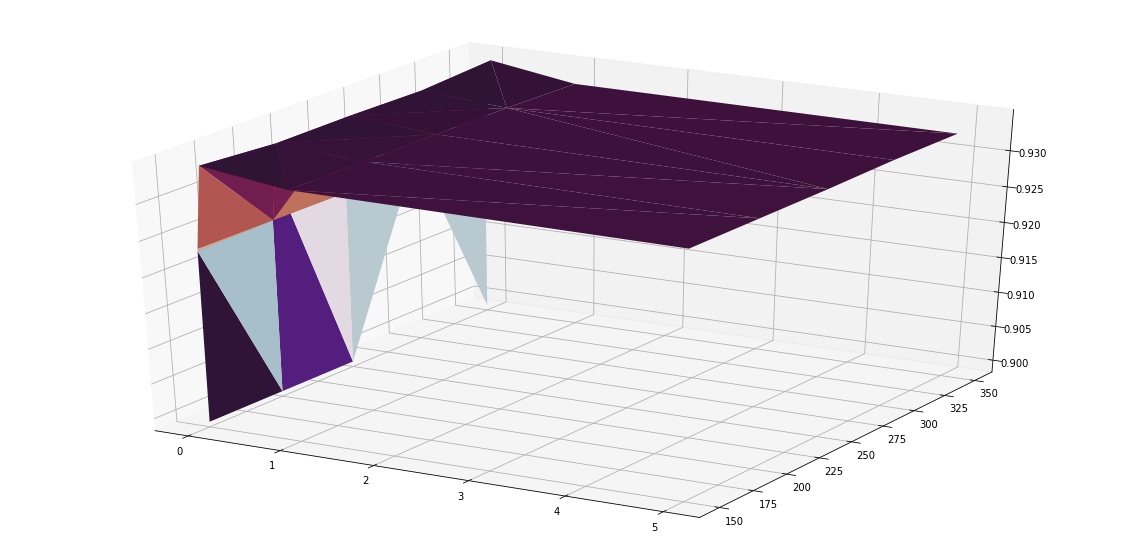

In [86]:
X,Y,Z= np.array(X),np.array(Y),np.array(Z)
fig= plt.figure(figsize=(20,10))
ax=plt.axes(projection='3d')
ax.plot_trisurf (X,Y,Z,cmap='twilight_shifted')
fig.show()

##### time complexity
##### doesnt depend on previous value
##### dive deeper

## Logistic Regression with Randomised search

In [94]:
# logistic regression with randomsearch

start_time=time.time()
clf= LogisticRegression(solver="liblinear")
distributions= dict(penalty=['l1','l2'],C=uniform(loc=0, scale=4),max_iter=[150,200,250,300,350])
random_clf_acc= RandomizedSearchCV(clf,distributions,scoring='f1',verbose=0,n_jobs=-1,cv=5)
random_clf_acc.fit(X_train,Y_train)
end_time=time.time()
print("Total time taken", end_time-start_time)

Total time taken 5.638534069061279


In [95]:
# optimal parameters
random_clf_acc.best_params_

{'C': 0.3730576876813201, 'max_iter': 150, 'penalty': 'l2'}

In [97]:
# train model with best parameters
clf=LogisticRegression(solver="liblinear",C= 0.3730576876813201,max_iter=150,penalty='l2')
clf.fit(X_train,Y_train)

LogisticRegression(C=0.3730576876813201, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=150, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
predicted_values= clf.predict(X_test)

In [99]:
# new model evaluation metrics
print('Accuracy Score:' + str(accuracy_score(Y_test,predicted_values)))
print('Precision Score:'+ str(accuracy_score(Y_test,predicted_values)))
print('Recall Score:'+ str(recall_score(Y_test, predicted_values)))
print('F1 Score:' + str(f1_score(Y_test,predicted_values)))

Accuracy Score:0.93186614410612
Precision Score:0.93186614410612
Recall Score:0.9536279323513366
F1 Score:0.939279957012359


In [100]:
random_clf_acc.best_score_

0.9341818244906144

In [101]:
# storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Logistic Regression', random_clf_acc.best_score_)

In [102]:
X,Y,Z=[],[],[]
for i,j in zip(random_clf_acc.cv_results_["params"],grid_clf_acc.cv_results_["mean_test_score"]):
  
  X.append(i["C"])
  Y.append(i["max_iter"])
  Z.append(j)
  print(i,j)

{'C': 0.719859187723022, 'max_iter': 250, 'penalty': 'l1'} 0.8989926461861332
{'C': 3.6882151798289704, 'max_iter': 350, 'penalty': 'l2'} 0.9253080153632457
{'C': 1.1174026914926403, 'max_iter': 250, 'penalty': 'l2'} 0.8989926461861332
{'C': 2.0634269498918028, 'max_iter': 300, 'penalty': 'l2'} 0.9253080153632457
{'C': 0.5811811689536936, 'max_iter': 300, 'penalty': 'l2'} 0.8989926461861332
{'C': 1.9951529240334627, 'max_iter': 250, 'penalty': 'l1'} 0.9253080153632457
{'C': 1.7090661911531608, 'max_iter': 150, 'penalty': 'l2'} 0.8989926461861332
{'C': 2.165311743800904, 'max_iter': 250, 'penalty': 'l1'} 0.9253080153632457
{'C': 0.3730576876813201, 'max_iter': 150, 'penalty': 'l2'} 0.8989926461861332
{'C': 3.0195654215865333, 'max_iter': 150, 'penalty': 'l2'} 0.9253080153632457


In [104]:
fpr, tpr, thresholds = roc_curve(Y_test, predicted_values)

# Area Under Curve
auc = roc_auc_score(Y_test, predicted_values)
auc

0.9293072276311939

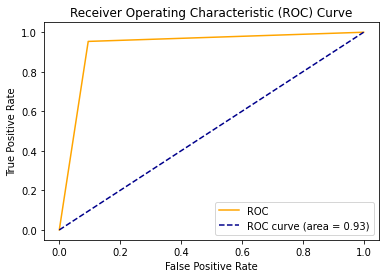

In [105]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

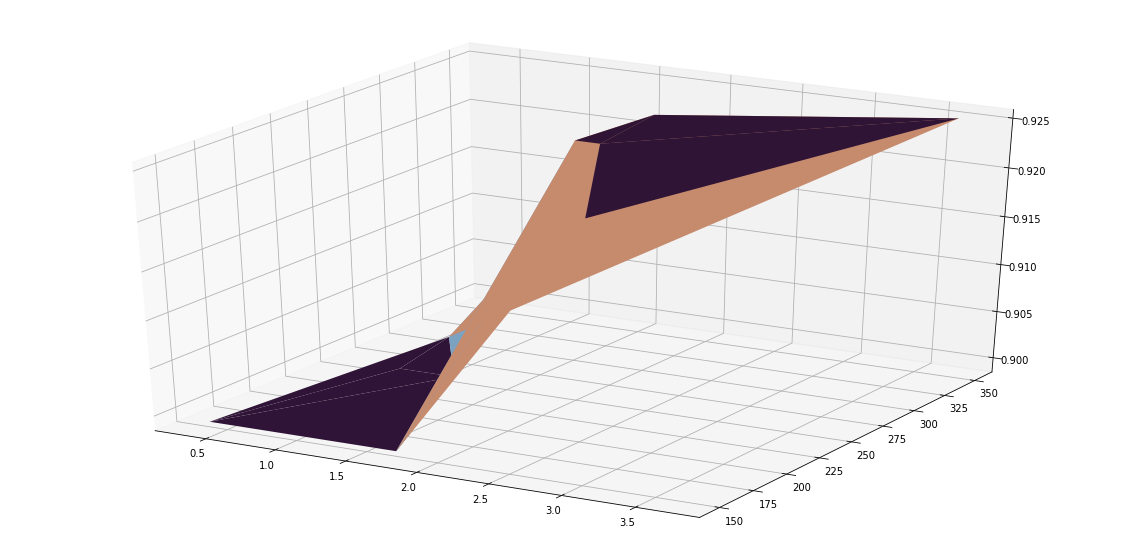

In [106]:
X,Y,Z= np.array(X),np.array(Y),np.array(Z)
fig= plt.figure(figsize=(20,10))
ax=plt.axes(projection='3d')
ax.plot_trisurf (X,Y,Z,cmap='twilight_shifted')
fig.show()

## KNN- Classifier

### Feature Scaling

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [108]:
scaler.fit(df.drop('Result',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [109]:
scaled_features = scaler.transform(df.drop('Result',axis=1))

In [110]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,0.722709,-0.478816,0.387614,0.419600,0.385295,-0.390849,-1.301501,-1.371855,1.419700,0.477557,0.396520,0.440424,-1.208056,-1.291381,-1.154365,-0.532534,0.471978,0.415716,-0.361705,0.367437,0.21212,0.489518,0.317438,-1.063235,-1.486897,-0.347097,-0.589921,-2.486611,-0.603608,0.403822
1,0.722709,2.131943,0.387614,-2.383224,0.385295,-0.390849,-1.301501,-1.371855,-0.704374,0.477557,0.396520,0.440424,0.827776,-1.291381,0.154642,2.102134,0.471978,0.415716,-0.361705,0.367437,0.21212,0.489518,0.317438,-1.063235,0.672542,-1.555270,-0.589921,-2.486611,-0.603608,0.403822
2,0.722709,-0.478816,0.387614,0.419600,0.385295,-0.390849,1.145038,0.821486,-0.704374,0.477557,0.396520,0.440424,-1.208056,0.107014,1.463648,2.102134,0.471978,0.415716,-0.361705,0.367437,0.21212,0.489518,0.317438,-1.063235,0.672542,0.861076,1.695143,0.402154,-0.603608,0.403822
3,-1.383683,-0.478816,0.387614,-2.383224,0.385295,-0.390849,-1.301501,-0.275184,1.419700,-2.093992,-2.521941,0.440424,-1.208056,-1.291381,1.463648,-0.532534,-2.118744,0.415716,-0.361705,0.367437,0.21212,-2.042826,0.317438,0.940526,0.672542,-0.347097,-0.589921,-2.486611,-0.603608,0.403822
4,0.722709,-0.478816,-2.579887,-2.383224,-2.595415,-0.390849,-0.078232,0.821486,-0.704374,0.477557,0.396520,-2.270539,0.827776,0.107014,-1.154365,2.102134,-2.118744,-2.405488,-0.361705,0.367437,0.21212,0.489518,0.317438,-1.063235,-1.486897,0.861076,1.695143,0.402154,-2.358245,0.403822


In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_features,df['Result'],test_size=0.30)
X_train.shape,X_test.shape

((7738, 30), (3317, 30))

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [113]:
pred = knn.predict(X_test)

In [114]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [115]:
print(confusion_matrix(y_test,pred))

[[1396   74]
 [  69 1778]]


In [116]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95      1470
           1       0.96      0.96      0.96      1847

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



In [117]:
knn_acc=accuracy_score(y_test,pred)

In [118]:
print(knn_acc)

0.9568887548990052


In [123]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

# Area Under Curve
auc = roc_auc_score(y_test, pred)
auc

0.9561509931530814

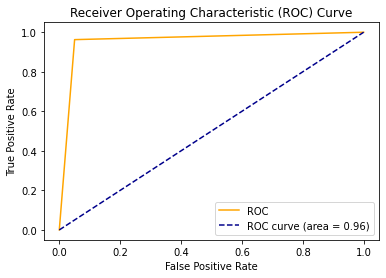

In [124]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [119]:
storeResults('K-NN Classifier', knn_acc)

In [120]:
# choosing k value
accuracy_rate=[]

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  score = cross_val_score(knn,df_feat,df['Result'],cv=10)
  accuracy_rate.append(score.mean())
  

In [121]:
error_rate=[]

for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  score = cross_val_score(knn,df_feat,df['Result'],cv=10)
  error_rate.append(1-score.mean())

Text(0.5, 0, 'K')

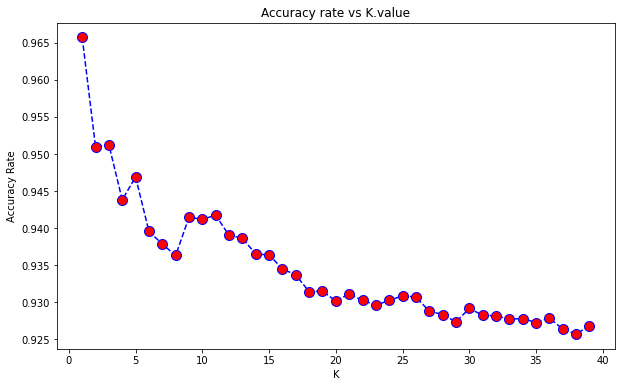

In [122]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40), error_rate, color='blue', marker='o',linestyle ='dashed',markersize=10,markerfacecolor='red')
#plt.ylabel('Error Rate')
#plt.title('Error rate vs K.value')
plt.plot(range(1,40), accuracy_rate, color='blue', marker='o',linestyle ='dashed',markersize=10,markerfacecolor='red')
plt.title('Accuracy rate vs K.value')
plt.ylabel('Accuracy Rate')
plt.xlabel('K')

## Support Vector Classifier

In [125]:
df.shape

(11055, 31)

In [126]:
#spearting data
X= df.drop(columns='Result')
Y=df['Result']

In [127]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 35)
X_train.shape, X_test.shape

((7738, 30), (3317, 30))

In [128]:
from sklearn import svm


In [129]:
classifier=svm.SVC(kernel="linear", gamma='auto',C=2)

In [130]:
classifier.fit(X_train,Y_train)
y_predict = classifier.predict(X_test)


In [131]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [132]:
print(confusion_matrix(Y_test,y_predict))

[[1341  143]
 [  85 1748]]


In [133]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

          -1       0.94      0.90      0.92      1484
           1       0.92      0.95      0.94      1833

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



In [134]:
accuracy_score(Y_test,y_predict)

0.931263189629183

In [135]:
from sklearn.svm import LinearSVC
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, Y_train)
from sklearn.metrics import accuracy_score
y_pred = lin_clf.predict(X_train)
accuracy_score(Y_train, y_pred)

0.927500646161799

In [136]:
from sklearn.svm import LinearSVC
# Feature Scaling(Standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [137]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [138]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, Y_train)
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(Y_train, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.927500646161799

In [139]:
from sklearn.svm import SVC
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], Y_train[:10000]) # We use an SVC with an RBF kernel
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(Y_train, y_pred)

0.956707159472732

## SVC using Randomized Search

In [140]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

#Adding all values of hyperparameters in a list from which the values of hyperparameter will randomly inserted as hyperparameter

In [141]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:10000], Y_train[:10000])


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=3.1634338641472404, gamma=0.011579422970852965 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . C=3.1634338641472404, gamma=0.011579422970852965, total=   0.8s
[CV] C=3.1634338641472404, gamma=0.011579422970852965 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] . C=3.1634338641472404, gamma=0.011579422970852965, total=   0.7s
[CV] C=3.1634338641472404, gamma=0.011579422970852965 ................
[CV] . C=3.1634338641472404, gamma=0.011579422970852965, total=   0.7s
[CV] C=9.547648132618429, gamma=0.03048255358977977 ..................
[CV] ... C=9.547648132618429, gamma=0.03048255358977977, total=   0.8s
[CV] C=9.547648132618429, gamma=0.03048255358977977 ..................
[CV] ... C=9.547648132618429, gamma=0.03048255358977977, total=   0.8s
[CV] C=9.547648132618429, gamma=0.03048255358977977 ..................
[CV] ... C=9.547648132618429, gamma=0.03048255358977977, total=   0.7s
[CV] C=6.111312635373622, gamma=0.0595568374522479 ...................
[CV] .... C=6.111312635373622, gamma=0.0595568374522479, total=   1.0s
[CV] C=6.111312635373622, gamma=0.0595568374522479 ...................
[CV] .... C=6.111312635373622, gamma=0.0595568374522479, total=   1.1s
[CV] C=6.111312635373622, gamma=0.0595568374522479 ...................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   22.5s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0648fb6358>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0648fcca58>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [142]:

rnd_search_cv.best_estimator_

SVC(C=6.111312635373622, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.0595568374522479, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [143]:
rnd_search_cv.best_score_

0.9567072248222325

In [144]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, Y_train)

SVC(C=6.111312635373622, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.0595568374522479, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [145]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [146]:
y_predict = rnd_search_cv.best_estimator_.predict(X_test_scaled)
Svm_clf=accuracy_score(Y_test, y_predict)


In [147]:
print(Svm_clf)

0.967138981006934


In [148]:
storeResults('SVC', Svm_clf)

In [149]:
# new model evaluation metrics
print('Accuracy Score:' + str(accuracy_score(Y_test,y_predict)))
print('Precision Score:'+ str(accuracy_score(Y_test,y_predict)))
print('Recall Score:'+ str(recall_score(Y_test, y_predict)))
print('F1 Score:' + str(f1_score(Y_test,y_predict)))

Accuracy Score:0.967138981006934
Precision Score:0.967138981006934
Recall Score:0.9765411893071467
F1 Score:0.9704526972079154


In [150]:
fpr, tpr, thresholds = roc_curve(Y_test, y_predict)

# Area Under Curve
auc = roc_auc_score(Y_test, y_predict)
auc

0.9660333978880747

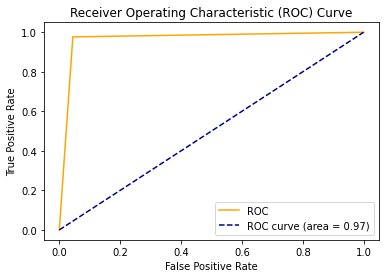

In [151]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Decisin Tree Classifier with Randamized Search

In [176]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [177]:
# Feature Scaling(Standardization)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [178]:
#Hyperparameter tunning
# setup the parameters and distributions to sample from: param_dict
param_dict = {"max_depth":[3,None], "min_samples_leaf":randint(1,9), "criterion":["gini","entropy"]}

In [179]:
# Instantiate a DT classifier: tree
tree = DecisionTreeClassifier()

In [180]:
# Instantiate a RandomizedSearchCV : tree_cv
tree_cv= RandomizedSearchCV(tree, param_dict, cv=5)

In [181]:
tree_cv.fit(X_train_scaled,Y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [182]:
tree_cv.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}

In [183]:
tree_cv.best_score_

0.9565774550726671

In [184]:
y_predd = tree_cv.predict(X_test_scaled)

In [185]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(classification_report(Y_test,y_predd))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96      1484
           1       0.96      0.97      0.97      1833

    accuracy                           0.96      3317
   macro avg       0.96      0.96      0.96      3317
weighted avg       0.96      0.96      0.96      3317



In [186]:
dt_clf =accuracy_score(Y_test,y_predd)

In [187]:
print(dt_clf)

0.9632197769068436


In [188]:
storeResults('Decision tree', dt_clf)

In [189]:
fpr, tpr, thresholds = roc_curve(Y_test, y_predd)

# Area Under Curve
auc = roc_auc_score(Y_test, y_predd)
auc

0.9624872985972945

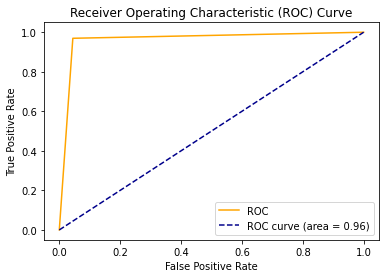

In [190]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## RandomForest Classifier with Randomized Search

In [191]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, criterion = 'gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True,n_jobs=-1, random_state=42)


In [192]:
#spearting data
X= df.drop(columns='Result')
Y=df['Result']

In [193]:
X.shape,Y.shape

((11055, 30), (11055,))

In [194]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 35)
X_train.shape, X_test.shape

((7738, 30), (3317, 30))

In [195]:
model.fit(X_train,Y_train)
y_predR = model.predict(X_test)

In [196]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,y_predR))
from sklearn import metrics
print(metrics.accuracy_score(Y_test,y_predR))

[[1405   79]
 [  35 1798]]
0.9656315948145915


In [197]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [198]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 17.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [199]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1800}

In [200]:
rf_random.best_score_

0.9671747457350314

In [201]:
y_predR = rf_random.predict(X_test)

In [202]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(classification_report(Y_test,y_predR))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.97      1484
           1       0.97      0.98      0.98      1833

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



In [203]:
rf_clf= accuracy_score(Y_test,y_predR)

In [204]:
print(rf_clf)

0.9725655712993669


In [205]:
storeResults('Random Forest',rf_clf )

In [206]:
fpr, tpr, thresholds = roc_curve(Y_test, y_predR)

# Area Under Curve
auc = roc_auc_score(Y_test, y_predR)
auc

0.9717131857838401

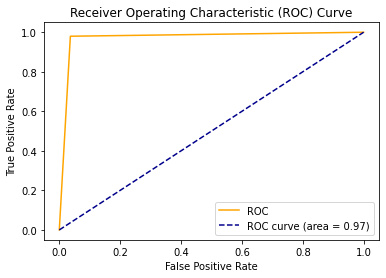

In [207]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## XG Boost Classifier with Raandomized SearchCV

In [223]:
X_train.shape,Y_train.shape

((7738, 30), (7738,))

In [224]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [225]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [226]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [227]:
classifier=xgboost.XGBClassifier()

In [228]:
random_search= RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [229]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   32.5s finished



 Time taken: 0 hours 0 minutes and 35.33 seconds.


In [230]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
              learning_rate=0.25, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [231]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.3,
 'learning_rate': 0.25,
 'max_depth': 15,
 'min_child_weight': 1}

In [232]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [233]:
random_search.best_score_

0.9967748907832183

In [234]:
y_predX = random_search.predict(X_test)

In [235]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(classification_report(Y_test,y_predX))

              precision    recall  f1-score   support

          -1       0.99      0.98      0.99      1484
           1       0.99      0.99      0.99      1833

    accuracy                           0.99      3317
   macro avg       0.99      0.99      0.99      3317
weighted avg       0.99      0.99      0.99      3317



In [236]:
XGB_clf=accuracy_score(Y_test,y_predX)

In [237]:
print(XGB_clf)

0.9876394332227917


In [238]:
storeResults('XG-Boost', XGB_clf)

In [239]:
fpr, tpr, thresholds = roc_curve(Y_test, y_predX)

# Area Under Curve
auc = roc_auc_score(Y_test, y_predX)
auc

0.9870840888002671

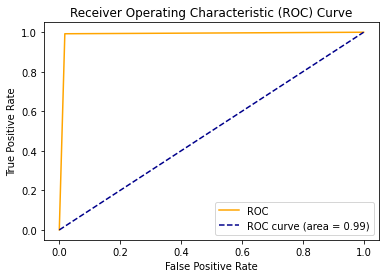

In [240]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [241]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model, 
                        'Test Accuracy': acc_test})
results

,ML Model,Test Accuracy
0,Logistic Regression,0.934
1,K-NN Classifier,0.957
2,SVC,0.967
3,Decision tree,0.963
4,Random Forest,0.973
5,XG-Boost,0.988


In [242]:
#Sorting the datafram on accuracy
s=results.sort_values(by=['Test Accuracy'], ascending=False)

In [243]:
s

,ML Model,Test Accuracy
5,XG-Boost,0.988
4,Random Forest,0.973
2,SVC,0.967
3,Decision tree,0.963
1,K-NN Classifier,0.957
0,Logistic Regression,0.934


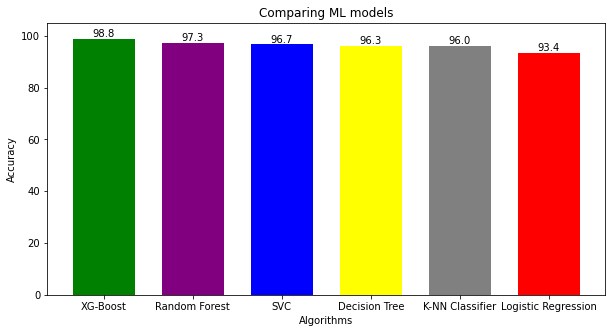

In [2]:
import matplotlib.pyplot as plt
Algorithms= ['XG-Boost','Random Forest','SVC','Decision Tree','K-NN Classifier','Logistic Regression']
Accuracy = [98.8,97.3,96.7,96.3,96.0,93.4]
c=["green","purple","blue","yellow","grey","red"]
fig = plt.figure(figsize = (10, 5))
plt.bar(Algorithms,Accuracy, width=0.7,color=c)
for i in range(len(Accuracy)):
    plt.text(i,Accuracy[i],Accuracy[i],ha="center",va="bottom")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparing ML models")
plt.ylim([0,105])
plt.show()